In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
df = pd.read_csv("london_merged.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df.shape

(17414, 10)

In [5]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [6]:
# renaming columns for easier understanding
renamed_cols = {
    'timestamp': 'time',
    'cnt': 'count',
    't1': 'real_temp',
    't2': 'feels_like_temp',
    'hum': 'humidity_%',
    'wind_speed': 'wind_speed',
    'weather_code': 'weather',
    'is_holiday': 'is_holiday',
    'is_weekend': 'is_weekend',
    'season': 'season'
}

df.rename(renamed_cols, axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             17414 non-null  object 
 1   count            17414 non-null  int64  
 2   real_temp        17414 non-null  float64
 3   feels_like_temp  17414 non-null  float64
 4   humidity_%       17414 non-null  float64
 5   wind_speed       17414 non-null  float64
 6   weather          17414 non-null  float64
 7   is_holiday       17414 non-null  float64
 8   is_weekend       17414 non-null  float64
 9   season           17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
# Changing numerical values in 'season' and 'weather_code' columns to actual string values
season_actual = {
    '0.0': 'spring',
    '1.0': 'summer',
    '2.0': 'autumn',
    '3.0': 'winter'
}

df['season'] = df['season'].astype(str)
df['season'] = df['season'].map(season_actual)

weather_actual = {
    '1.0': 'Clear',
    '2.0': 'Scattered clouds',
    '3.0': 'Broken clouds',
    '4.0': 'Cloudy',
    '7.0': 'Rain',
    '10.0': 'Rain with thunderstorm',
    '26.0': 'Snowfall'
}

df['weather'] = df['weather'].astype(str)
df['weather'] = df['weather'].map(weather_actual)

In [9]:
df.head()

,time,count,real_temp,feels_like_temp,humidity_%,wind_speed,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,winter


In [ ]:
# Changing of data type 
df['time'] = pd.to_datetime(df['time'])
df['is_holiday'] = df['is_holiday'].astype(int)
df['is_weekend'] = df['is_weekend'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             17414 non-null  datetime64[ns]
 1   count            17414 non-null  int64         
 2   real_temp        17414 non-null  float64       
 3   feels_like_temp  17414 non-null  float64       
 4   humidity_%       17414 non-null  float64       
 5   wind_speed       17414 non-null  float64       
 6   weather          17414 non-null  object        
 7   is_holiday       17414 non-null  int64         
 8   is_weekend       17414 non-null  int64         
 9   season           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 1.3+ MB


In [13]:
df.isnull().sum()

time               0
count              0
real_temp          0
feels_like_temp    0
humidity_%         0
wind_speed         0
weather            0
is_holiday         0
is_weekend         0
season             0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [16]:
#Export to excel for visualisation purposes
df.to_excel('london_bikes_final.xlsx', sheet_name='Data')

# **Analysis with dataset using matplotlib and seaborn**

### Visualising which season gathers the highest bike sales

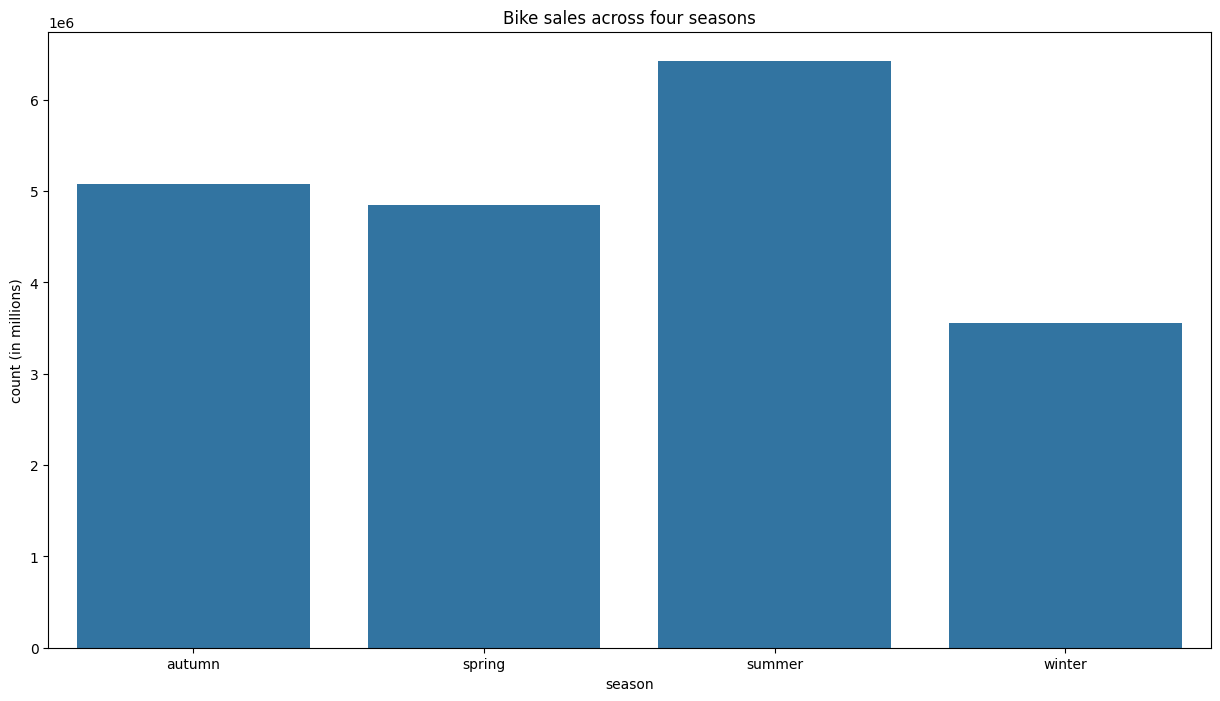

In [45]:
plt.figure(figsize=(15,8))
plt.title(label='Bike sales across four seasons')
plt.ylabel('count (in millions)')
sns.barplot(data=df.groupby('season', as_index=False)['count'].sum(), x='season', y='count')
plt.show()

#### From the above, we can see that the **summer** season garners the most bike sales

### visualising which temperature range gets more bike sales

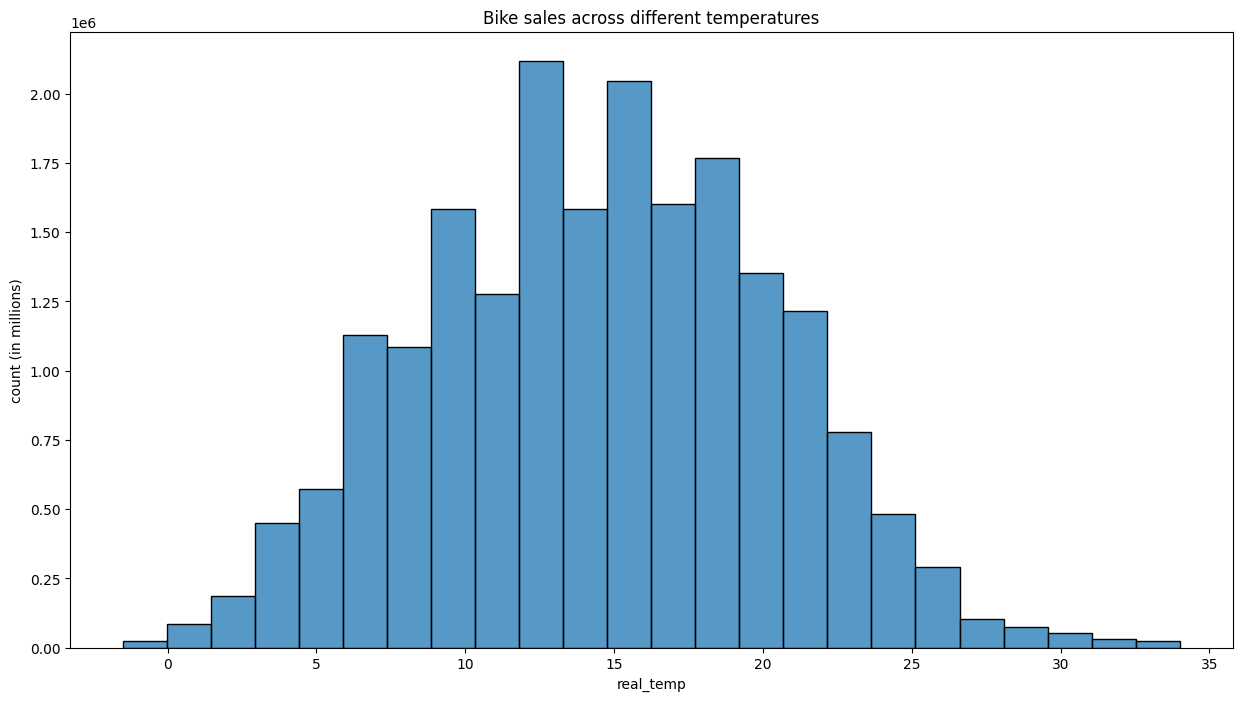

In [55]:
plt.figure(figsize=(15,8))
plt.title(label='Bike sales across different temperatures')
plt.ylabel('count (in millions)')
sns.histplot(data=df.groupby('real_temp', as_index=False)['count'].sum(), x='real_temp', weights='count', bins=24)
plt.show()

#### From the graph, we can see that the temperature range of 10 degree celsius to 20 degree celsius range will have a higher bike sales.

### Visualising the sales of bikes over the different years

In [ ]:
# Creating a year column
df['year'] = df['time'].dt.year
df

,time,count,real_temp,feels_like_temp,humidity_%,wind_speed,weather,is_holiday,is_weekend,season,year
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0,1,winter,2015
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0,1,winter,2015
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0,1,winter,2015
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0,1,winter,2015
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0,1,winter,2015
...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,Broken clouds,0,0,winter,2017
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,Cloudy,0,0,winter,2017
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,Cloudy,0,0,winter,2017
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,Cloudy,0,0,winter,2017


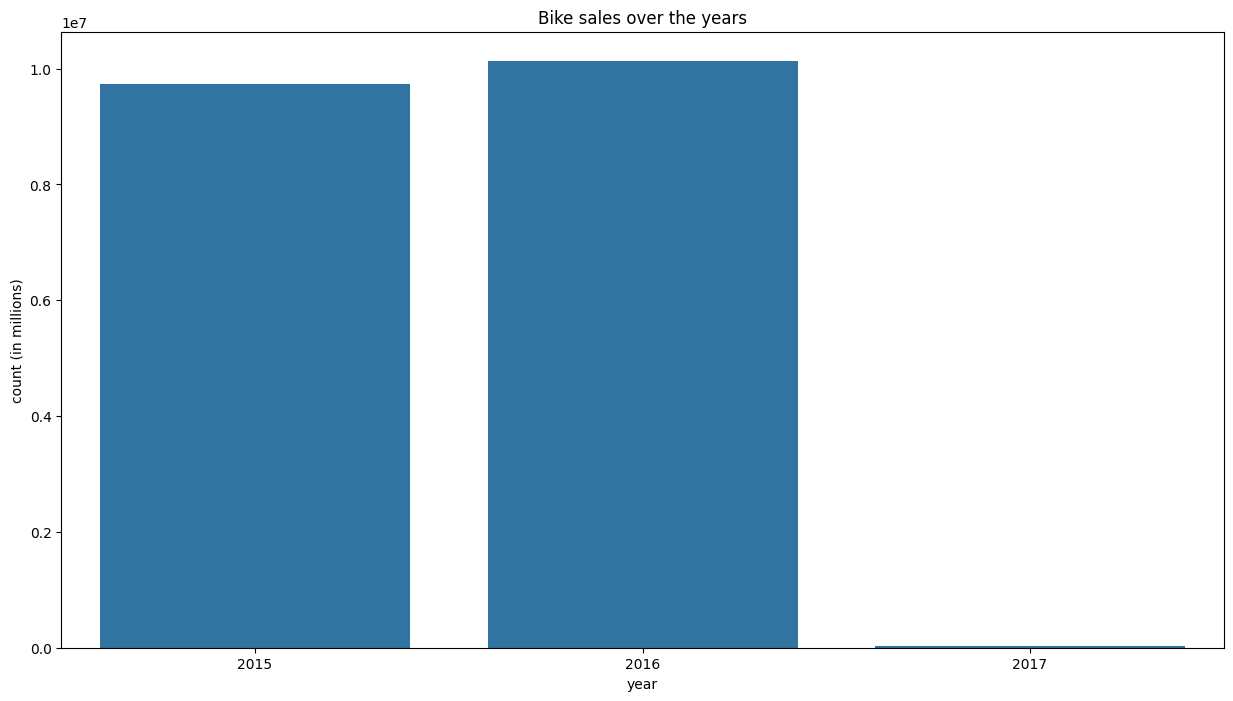

In [60]:
plt.figure(figsize=(15,8))
plt.title(label='Bike sales over the years')
plt.ylabel('count (in millions)')
sns.barplot(data=df.groupby('year', as_index=False)['count'].sum(), x='year', y='count')
plt.show()

#### Since 2017 only has records until January 2017, we shall look at 2015 and 2016 instead

In [83]:
# Creating a date column
df['date'] = df['time'].dt.date
df['date'] = pd.to_datetime(df['date'])

df_2015_2016 = df[df['date'] < '2017-01-01']

# creating a month column for better visualisation
df_2015_2016['month'] = df_2015_2016['date'].dt.month_name()

df_2015_2016

/var/folders/jg/17fvjb1x4y3dr0br_h6n915r0000gn/T/ipykernel_45127/1552959259.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015_2016['month'] = df_2015_2016['date'].dt.month_name()


,time,count,real_temp,feels_like_temp,humidity_%,wind_speed,weather,is_holiday,is_weekend,season,year,date,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0,1,winter,2015,2015-01-04,January
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0,1,winter,2015,2015-01-04,January
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0,1,winter,2015,2015-01-04,January
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0,1,winter,2015,2015-01-04,January
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0,1,winter,2015,2015-01-04,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,2016-12-31 19:00:00,493,9.0,6.0,82.0,17.0,Cloudy,0,1,winter,2016,2016-12-31,December
17338,2016-12-31 20:00:00,465,8.5,6.5,84.5,13.0,Cloudy,0,1,winter,2016,2016-12-31,December
17339,2016-12-31 21:00:00,474,8.0,6.0,87.0,12.0,Cloudy,0,1,winter,2016,2016-12-31,December
17340,2016-12-31 22:00:00,587,8.0,6.0,90.0,12.0,Cloudy,0,1,winter,2016,2016-12-31,December


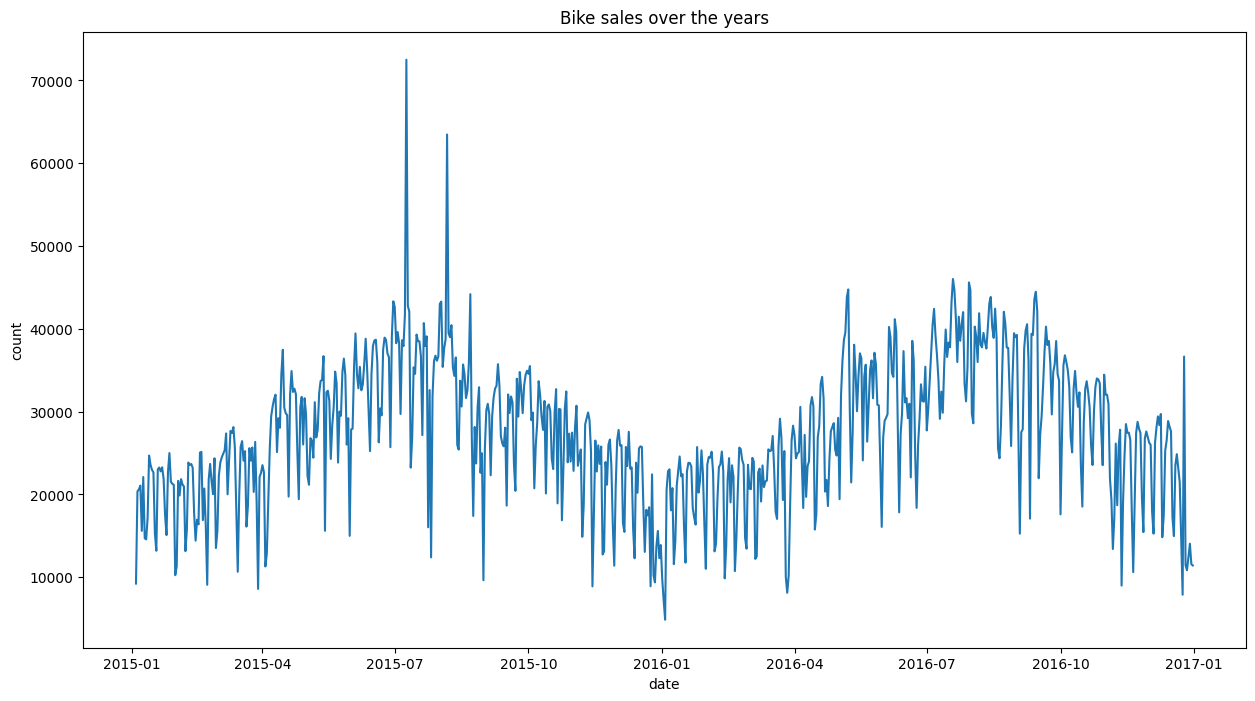

In [89]:
plt.figure(figsize=(15,8))
plt.title(label='Bike sales over the years')
plt.ylabel('count')
sns.lineplot(data=df_2015_2016.groupby('date', as_index=False)['count'].sum(), x='date', y='count')
plt.show()

#### This graph is too hard to read and does not tell us much except for the large peaks in july 2015. Let's break down the data into its individual years for better visualisation

In [90]:
# separating the dataset into 2 datasets for 2015 and 2016 respectively
df_2015 = df_2015_2016[df_2015_2016['year'] == 2015]
df_2016 = df_2015_2016[df_2015_2016['year'] == 2016]


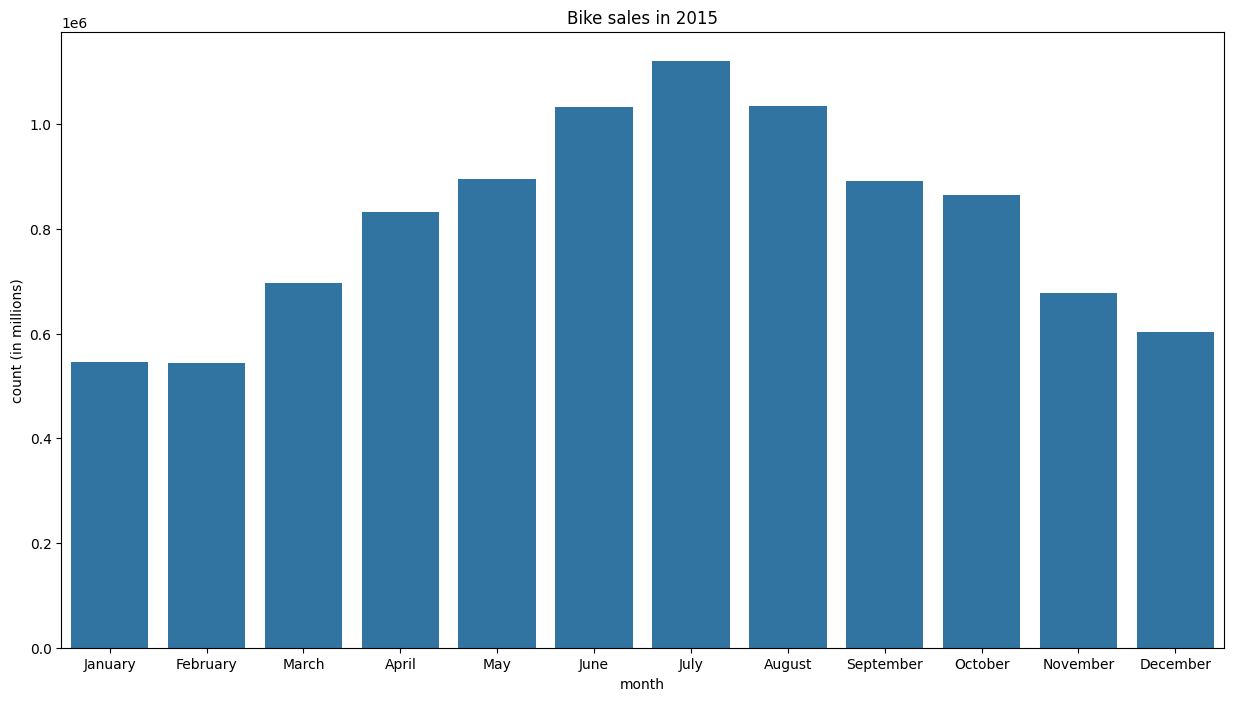

In [92]:
# bike sales in the months of 2015
plt.figure(figsize=(15,8))
plt.title(label='Bike sales in 2015')
plt.ylabel('count (in millions)')
sns.barplot(data=df_2015.groupby('month', as_index=False)['count'].sum(), x='month', y='count', order=df_2015['month'].unique())
plt.show()

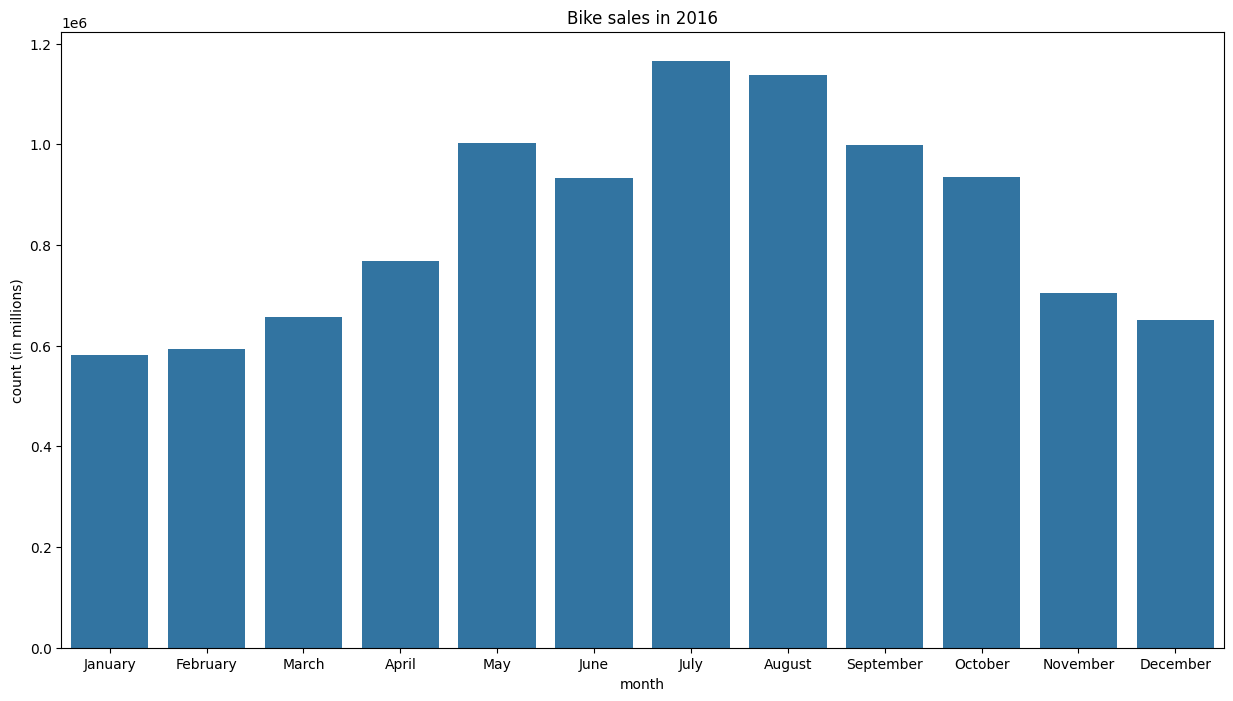

In [93]:
# bike sales in the months of 2016
plt.figure(figsize=(15,8))
plt.title(label='Bike sales in 2016')
plt.ylabel('count (in millions)')
sns.barplot(data=df_2016.groupby('month', as_index=False)['count'].sum(), x='month', y='count', order=df_2016['month'].unique())
plt.show()

#### from the 2015 and 2016 graph above, we see that there is a spike in bike sales during the months of July and August, which is the summer season. This corresponds to the bikes sales over the seasons graph at the start